In [3]:
!pip install pydicom
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_tv_chambolle
from skimage import img_as_float, metrics
from scipy.fft import fft2, ifft2, fftshift
import os


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


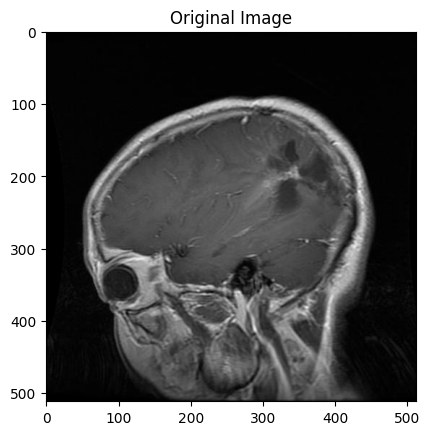

In [6]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_image_series(folder_path):
    slices = []
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        if filepath.endswith('.jpg'):  # Check if the file is a JPG image
            try:
                image = Image.open(filepath)
                slices.append(np.array(image))
            except Exception as e:
                print(f"Could not read {filename}: {e}")
    return np.array(slices)

# Set the correct folder path for your dataset
folder_path = '/kaggle/input/brain-tumor/Brain-Tumor-Classification-DataSet-master/Training/glioma_tumor'

# Load and visualize the image series
image_series = load_image_series(folder_path)
plt.imshow(image_series[0], cmap='gray')
plt.title("Original Image")
plt.show()


In [9]:
folder_path = '/kaggle/input/brain-tumor/Brain-Tumor-Classification-DataSet-master/Training/glioma_tumor'


In [10]:
import os

folder_path = '/kaggle/input/brain-tumor/Brain-Tumor-Classification-DataSet-master/Training/glioma_tumor'
print(os.listdir(folder_path))  # This will print all the files in the folder


['gg (180).jpg', 'gg (552).jpg', 'gg (11).jpg', 'gg (626).jpg', 'gg (541).jpg', 'gg (546).jpg', 'gg (664).jpg', 'gg (225).jpg', 'gg (399).jpg', 'gg (513).jpg', 'gg (290).jpg', 'gg (23).jpg', 'gg (176).jpg', 'gg (161).jpg', 'gg (76).jpg', 'gg (449).jpg', 'gg (143).jpg', 'gg (36).jpg', 'gg (528).jpg', 'gg (367).jpg', 'gg (707).jpg', 'gg (679).jpg', 'gg (30).jpg', 'gg (258).jpg', 'gg (781).jpg', 'gg (79).jpg', 'gg (510).jpg', 'gg (442).jpg', 'gg (59).jpg', 'gg (741).jpg', 'gg (214).jpg', 'gg (105).jpg', 'gg (360).jpg', 'gg (396).jpg', 'gg (42).jpg', 'gg (211).jpg', 'gg (78).jpg', 'gg (535).jpg', 'gg (89).jpg', 'gg (196).jpg', 'gg (434).jpg', 'gg (204).jpg', 'gg (815).jpg', 'gg (804).jpg', 'gg (264).jpg', 'gg (783).jpg', 'gg (826).jpg', 'gg (575).jpg', 'gg (591).jpg', 'gg (73).jpg', 'gg (800).jpg', 'gg (1).jpg', 'gg (696).jpg', 'gg (556).jpg', 'gg (788).jpg', 'gg (294).jpg', 'gg (687).jpg', 'gg (816).jpg', 'gg (261).jpg', 'gg (789).jpg', 'gg (213).jpg', 'gg (80).jpg', 'gg (629).jpg', 'gg (

In [11]:
def load_image_series(folder_path):
    slices = []
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        print(f"Found file: {filename}")  # This will show each file found
        if filename.endswith('.jpg'):  # Ensure only .jpg files are loaded
            try:
                image = Image.open(filepath).convert('L')  # Convert to grayscale
                slices.append(np.array(image))
            except Exception as e:
                print(f"Could not read {filename}: {e}")
    return np.array(slices)

folder_path = '/kaggle/input/brain-tumor/Brain-Tumor-Classification-DataSet-master/Training/glioma_tumor'
ct_series = load_image_series(folder_path)
print(f"Loaded {len(ct_series)} images.")


Found file: gg (180).jpg
Found file: gg (552).jpg
Found file: gg (11).jpg
Found file: gg (626).jpg
Found file: gg (541).jpg
Found file: gg (546).jpg
Found file: gg (664).jpg
Found file: gg (225).jpg
Found file: gg (399).jpg
Found file: gg (513).jpg
Found file: gg (290).jpg
Found file: gg (23).jpg
Found file: gg (176).jpg
Found file: gg (161).jpg
Found file: gg (76).jpg
Found file: gg (449).jpg
Found file: gg (143).jpg
Found file: gg (36).jpg
Found file: gg (528).jpg
Found file: gg (367).jpg
Found file: gg (707).jpg
Found file: gg (679).jpg
Found file: gg (30).jpg
Found file: gg (258).jpg
Found file: gg (781).jpg
Found file: gg (79).jpg
Found file: gg (510).jpg
Found file: gg (442).jpg
Found file: gg (59).jpg
Found file: gg (741).jpg
Found file: gg (214).jpg
Found file: gg (105).jpg
Found file: gg (360).jpg
Found file: gg (396).jpg
Found file: gg (42).jpg
Found file: gg (211).jpg
Found file: gg (78).jpg
Found file: gg (535).jpg
Found file: gg (89).jpg
Found file: gg (196).jpg
Found file

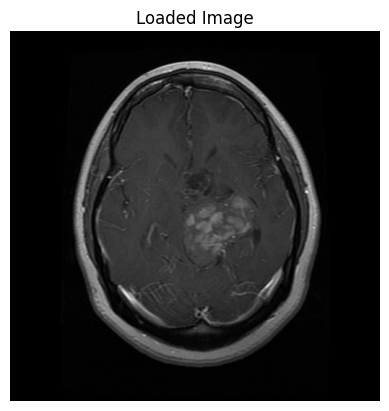

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

file_path = '/kaggle/input/brain-tumor/Brain-Tumor-Classification-DataSet-master/Training/glioma_tumor/gg (1).jpg'  # Adjust for a known file

try:
    image = Image.open(file_path)
    # Convert the image to a numpy array for displaying with matplotlib
    image_array = np.array(image)
    
    # Display the image using matplotlib
    plt.imshow(image_array, cmap='gray')
    plt.title("Loaded Image")
    plt.axis('off')  # Hide axes for better visualization
    plt.show()
except Exception as e:
    print(f"Error loading image: {e}")


display-im6.q16: unable to open X server `' @ error/display.c/DisplayImageCommand/412.


Number of images loaded: 826


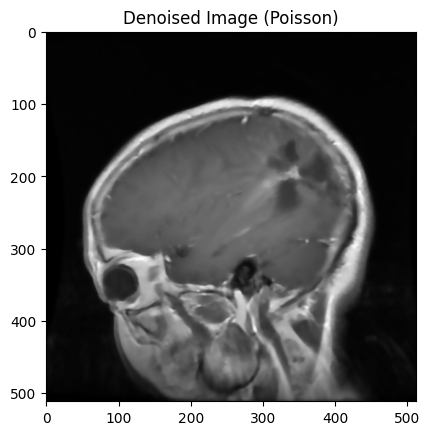

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.restoration import denoise_tv_chambolle
import os

# Function to load images
def load_image_series(folder_path):
    slices = []
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Adjust as necessary
            try:
                image = Image.open(filepath).convert('L')  # Convert to grayscale
                slices.append(np.array(image))
            except Exception as e:
                print(f"Could not read {filename}: {e}")
    return np.array(slices)

# Set the folder path (adjust to your dataset path)
folder_path = '/kaggle/input/brain-tumor/Brain-Tumor-Classification-DataSet-master/Training/glioma_tumor'

# Load the images
ct_series = load_image_series(folder_path)

# Ensure that ct_series is populated
print(f"Number of images loaded: {len(ct_series)}")

# Function to denoise using Total Variation Denoising
def denoise_poisson(image):
    image = img_as_float(image)
    denoised_image = denoise_tv_chambolle(image, weight=0.1)  # Adjust weight as needed
    return denoised_image

# Denoise the first slice as an example
denoised_image_poisson = denoise_poisson(ct_series[0])

# Display the denoised image
plt.imshow(denoised_image_poisson, cmap='gray')
plt.title("Denoised Image (Poisson)")
plt.show()


In [10]:
from numpy.fft import fft2, fftshift, ifft2


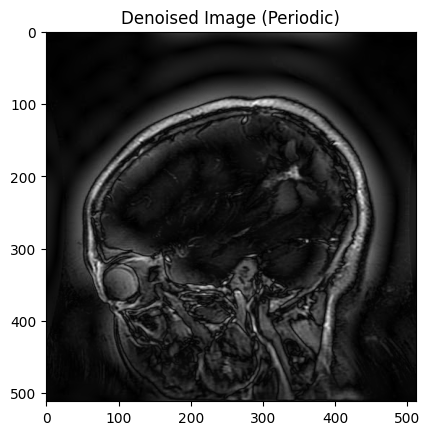

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift, ifft2

# Function to denoise using a periodic noise removal approach
def denoise_periodic(image):
    f_transform = fft2(image)
    f_transform_shifted = fftshift(f_transform)

    # Apply a notch filter by zeroing out specific frequencies
    # Customize this section based on the frequency pattern of the noise
    rows, cols = f_transform_shifted.shape
    center_row, center_col = rows // 2, cols // 2
    f_transform_shifted[center_row-5:center_row+5, center_col-5:center_col+5] = 0  # Example notch filter

    # Inverse FFT to convert back to spatial domain
    denoised_image = np.abs(ifft2(fftshift(f_transform_shifted)))
    return denoised_image

# Apply to the first slice as an example
denoised_image_periodic = denoise_periodic(ct_series[0])

# Display the denoised image
plt.imshow(denoised_image_periodic, cmap='gray')
plt.title("Denoised Image (Periodic)")
plt.show()


In [14]:
def calculate_snr(original, denoised):
    noise = original - denoised
    snr = np.mean(original) / np.std(noise)
    return snr


In [15]:
from skimage import metrics


In [17]:
def calculate_snr(original, denoised):
    noise = original - denoised
    noise_std = np.std(noise)
    if noise_std == 0:
        return np.inf  # No noise means infinite SNR
    snr = np.mean(original) / noise_std
    return snr


In [18]:
# For PSNR and SSIM, specify the data_range as 1.0 if the images are in [0, 1] range
psnr_poisson = metrics.peak_signal_noise_ratio(original_image, denoised_image_poisson, data_range=1.0)
ssim_poisson = metrics.structural_similarity(original_image, denoised_image_poisson, data_range=1.0)

print(f"PSNR (Poisson Denoised): {psnr_poisson}")
print(f"SSIM (Poisson Denoised): {ssim_poisson}")


PSNR (Poisson Denoised): -36.97093011303796
SSIM (Poisson Denoised): 0.015998612265392332


In [19]:
import numpy as np
from skimage import metrics

# Function to calculate SNR
def calculate_snr(original, denoised):
    noise = original - denoised
    noise_std = np.std(noise)
    if noise_std == 0:
        return np.inf  # No noise means infinite SNR
    snr = np.mean(original) / noise_std
    return snr

# Calculate SNR for the original and denoised images
original_image = ct_series[0]
snr_original = calculate_snr(original_image, original_image)
snr_poisson = calculate_snr(original_image, denoised_image_poisson)
snr_periodic = calculate_snr(original_image, denoised_image_periodic)

print(f"SNR (Original): {snr_original}")
print(f"SNR (Poisson Denoised): {snr_poisson}")
print(f"SNR (Periodic Denoised): {snr_periodic}")

# Optional: PSNR and SSIM (Ensure data_range is provided for floating-point images)
psnr_poisson = metrics.peak_signal_noise_ratio(original_image, denoised_image_poisson, data_range=1.0)
ssim_poisson = metrics.structural_similarity(original_image, denoised_image_poisson, data_range=1.0)

print(f"PSNR (Poisson Denoised): {psnr_poisson}")
print(f"SSIM (Poisson Denoised): {ssim_poisson}")


SNR (Original): inf
SNR (Poisson Denoised): 0.9882525359680627
SNR (Periodic Denoised): 1.1306413218436109
PSNR (Poisson Denoised): -36.97093011303796
SSIM (Poisson Denoised): 0.015998612265392332


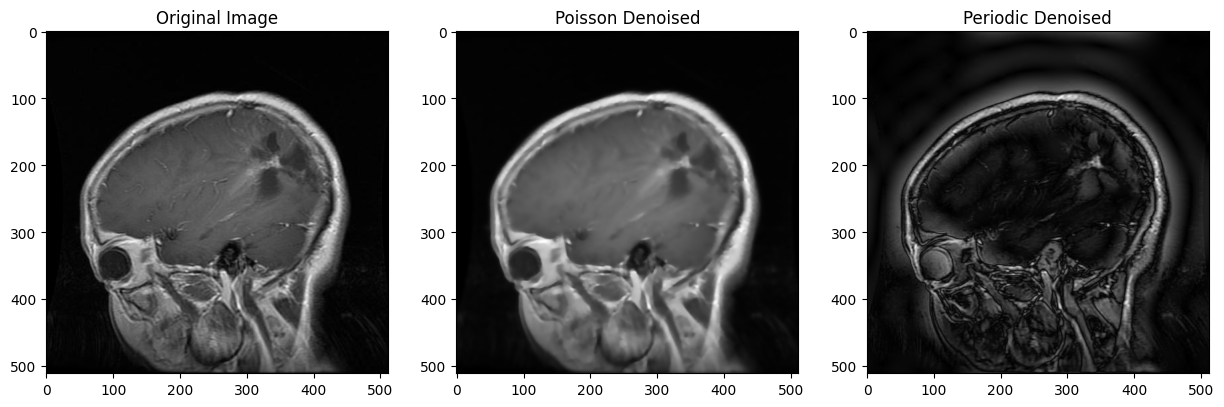

In [20]:
def display_images(original, poisson_denoised, periodic_denoised):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title("Original Image")
    axes[1].imshow(poisson_denoised, cmap='gray')
    axes[1].set_title("Poisson Denoised")
    axes[2].imshow(periodic_denoised, cmap='gray')
    axes[2].set_title("Periodic Denoised")
    plt.show()

display_images(original_image, denoised_image_poisson, denoised_image_periodic)
